In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from collections import defaultdict

In [3]:
file_path=r"C:\Users\adarsh_patel\Documents\developer_survey_2019\survey_results_public.csv"
schema_pth=r"C:\Users\adarsh_patel\Documents\developer_survey_2019\survey_results_schema.csv"

In [4]:
df=pd.read_csv(file_path)
schema_df=pd.read_csv(schema_pth)

In [5]:
schema_df.set_index('Column', inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
sns.set(style='darkgrid')

In [7]:
df.shape

(88883, 85)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [11]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [12]:
df.describe(include=['O'])

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompFreq,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88331,88883,88883,86842,87181,88751,87014,86390,75614,84260,71791,81335,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,67155,71344,79371,77877,71392,71392,63268,68914,68141,70284,70055,71779,70390,62668,61108,62029,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,87851,85366,48175,60165,86269,87141,86663,84437,87305,80486,83877,88263,88086,87816,86344,68378,87828,74692,88066,87841,88131,85855,69560,85406,83607,76147,76668,83059,86984,87081
unique,5,2,4,3,6,179,3,9,12,492,9,13141,52,69,52,5,5,4,3,4,3,6,63,2,175,6,143,144,3,3,129,7,3,5,3,4,4,3,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,4,21,5,5,2,4,3,14,3,5,13,6,63,5,5,4,3,6,3,3,6,6,15,7,2,7,196,2,3,3
top,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course",20 to 99 employees,"Developer, full-stack",5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development",I was preparing for a job search,USD,United States dollar,Yearly,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review","Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Windows,I do not use containers,Not at all,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Reddit,In real life (in person),Username,I don't remember,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,65679,71257,32295,41527,64440,20949,65816,39134,47214,6699,15199,8433,7047,8681,7959,29173,24207,25207,31346,22276,47260,25844,12383,60873,4992,33309,19490,19490,31505,34476,2318,30220,40592,32374,48424,26221,20424,26676,1483,1236,5556,3539,7031,3280,4171,3744,10571,6913,503

In [13]:
df['OpenSource'].value_counts(normalize=True)

The quality of OSS and closed source software is about the same                    0.478190
OSS is, on average, of HIGHER quality than proprietary / closed source software    0.420948
OSS is, on average, of LOWER quality than proprietary / closed source software     0.100861
Name: OpenSource, dtype: float64

In [14]:
df['OpenSourcer'].value_counts(normalize=True)

Never                                                 0.363343
Less than once per year                               0.280954
Less than once a month but more than once per year    0.231327
Once a month or more often                            0.124377
Name: OpenSourcer, dtype: float64

In [15]:
df['UndergradMajor'].value_counts(normalize=True)

Computer science, computer engineering, or software engineering          0.624408
Another engineering discipline (ex. civil, electrical, mechanical)       0.082286
Information systems, information technology, or system administration    0.069471
Web development or web design                                            0.045256
A natural science (ex. biology, chemistry, physics)                      0.042743
Mathematics or statistics                                                0.039345
A business discipline (ex. accounting, finance, marketing)               0.024347
A humanities discipline (ex. literature, history, philosophy)            0.020777
A social science (ex. anthropology, psychology, political science)       0.017880
Fine arts or performing arts (ex. graphic design, music, studio art)     0.016307
I never declared a major                                                 0.012908
A health science (ex. nursing, pharmacy, radiology)                      0.004272
Name: UndergradM

In [16]:
schema_df.loc['CompTotal']

QuestionText    What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.
Name: CompTotal, dtype: object

In [17]:
schema_df.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.
Name: ConvertedComp, dtype: object

In [18]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

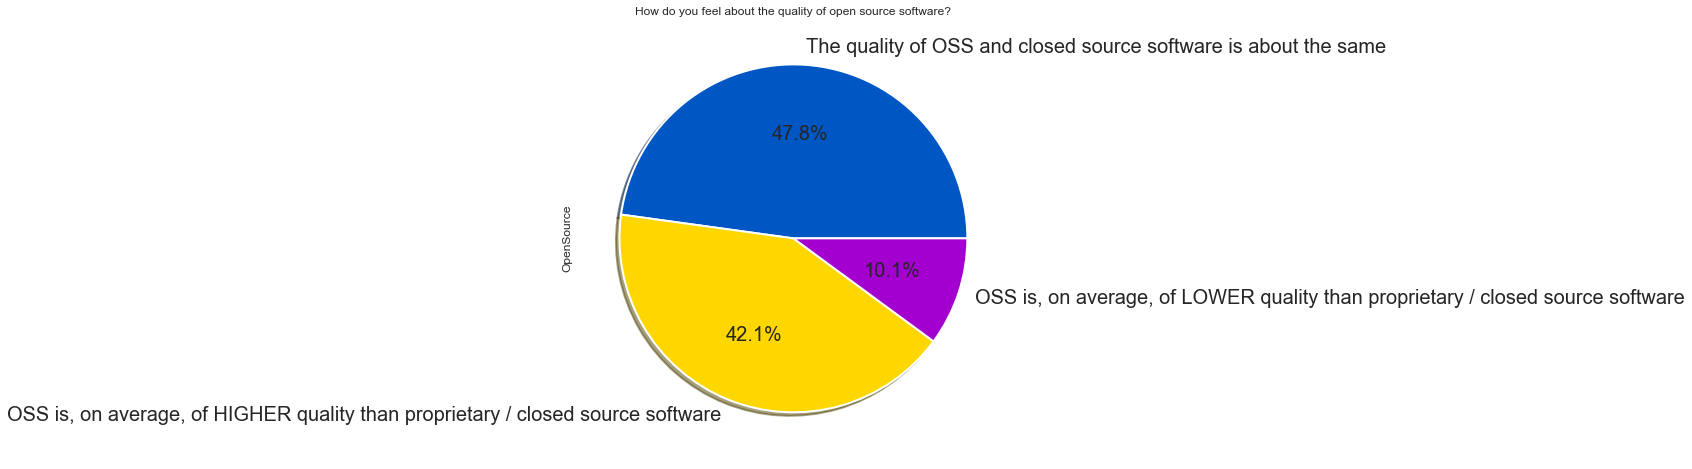

In [19]:
plt.figure(figsize=(8,8))
df["OpenSource"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("How do you feel about the quality of open source software?")
plt.show()

In [20]:
def get_unique_list(col):
    li=[]
    for i in df[col]:
        try:        
            if type(i)!='float':
                li.extend(i.split(";"))
        except:
            pass
    return set(li)

In [21]:
get_unique_list('JobFactors')

{'Diversity of the company or organization',
 'Financial performance or funding status of the company or organization',
 'Flex time or a flexible schedule',
 'How widely used or impactful my work output would be',
 "Industry that I'd be working in",
 "Languages, frameworks, and other technologies I'd be working with",
 'Office environment or company culture',
 'Opportunities for professional development',
 'Remote work options',
 "Specific department or team I'd be working on"}

In [22]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df

In [33]:
def get_val_counts(colname):
    '''
    INPUT:
    colname- pandas dataframe column
    
    OUTPUT:
    new_col= a dataframe which contains values count of one column. 
    '''
    col=df[colname].value_counts().reset_index()
    new_col=total_count(col, 'index', colname, get_unique_list(colname))
    new_col.set_index('index',inplace=True)
    return new_col

In [35]:
wc=get_val_counts('WorkChallenge')

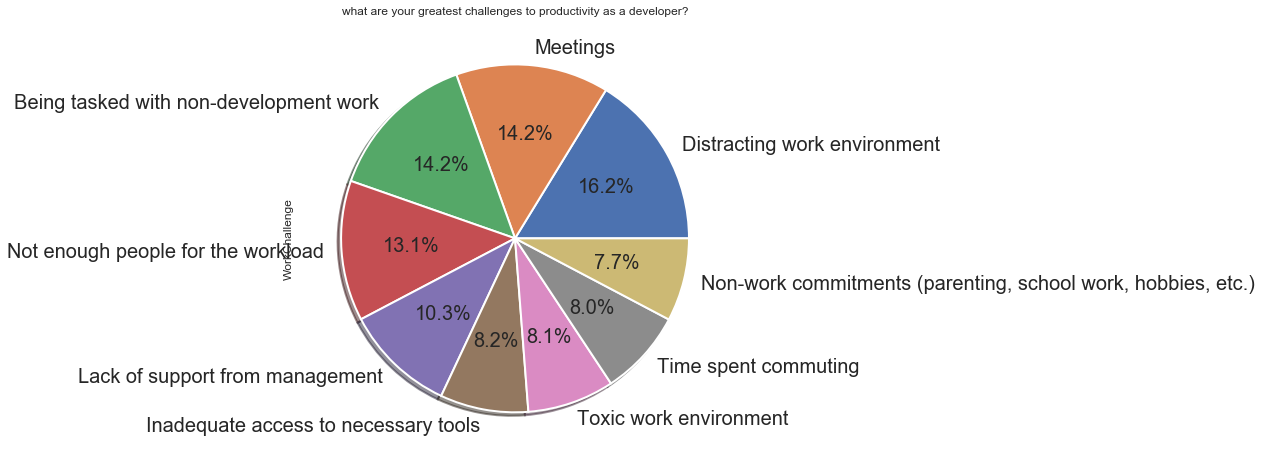

In [50]:
plt.figure(figsize=(8,8))
wc['WorkChallenge'].plot.pie(autopct = "%1.1f%%",fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("what are your greatest challenges to productivity as a developer?")
# plt.show()
plt.savefig('work_challenges.png',bbox_inches='tight')

In [37]:
jf=get_val_counts('JobFactors')

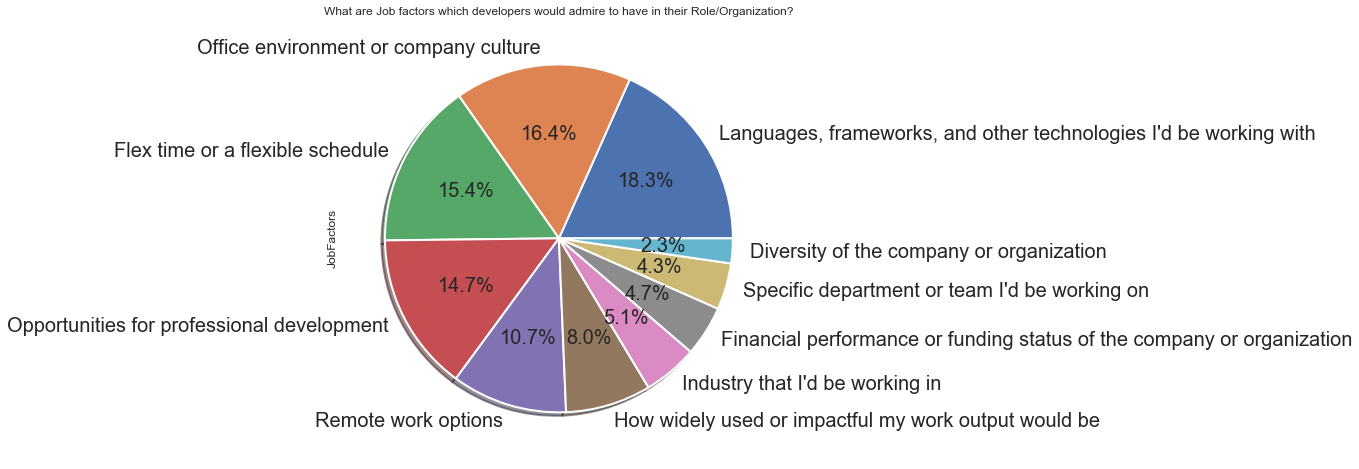

In [54]:
plt.figure(figsize=(8,8))
jf['JobFactors'].plot.pie(autopct = "%1.1f%%",fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("What are Job factors which developers would admire to have in their Role/Organization?")
# plt.show()
plt.savefig('job_factors.png',bbox_inches='tight')

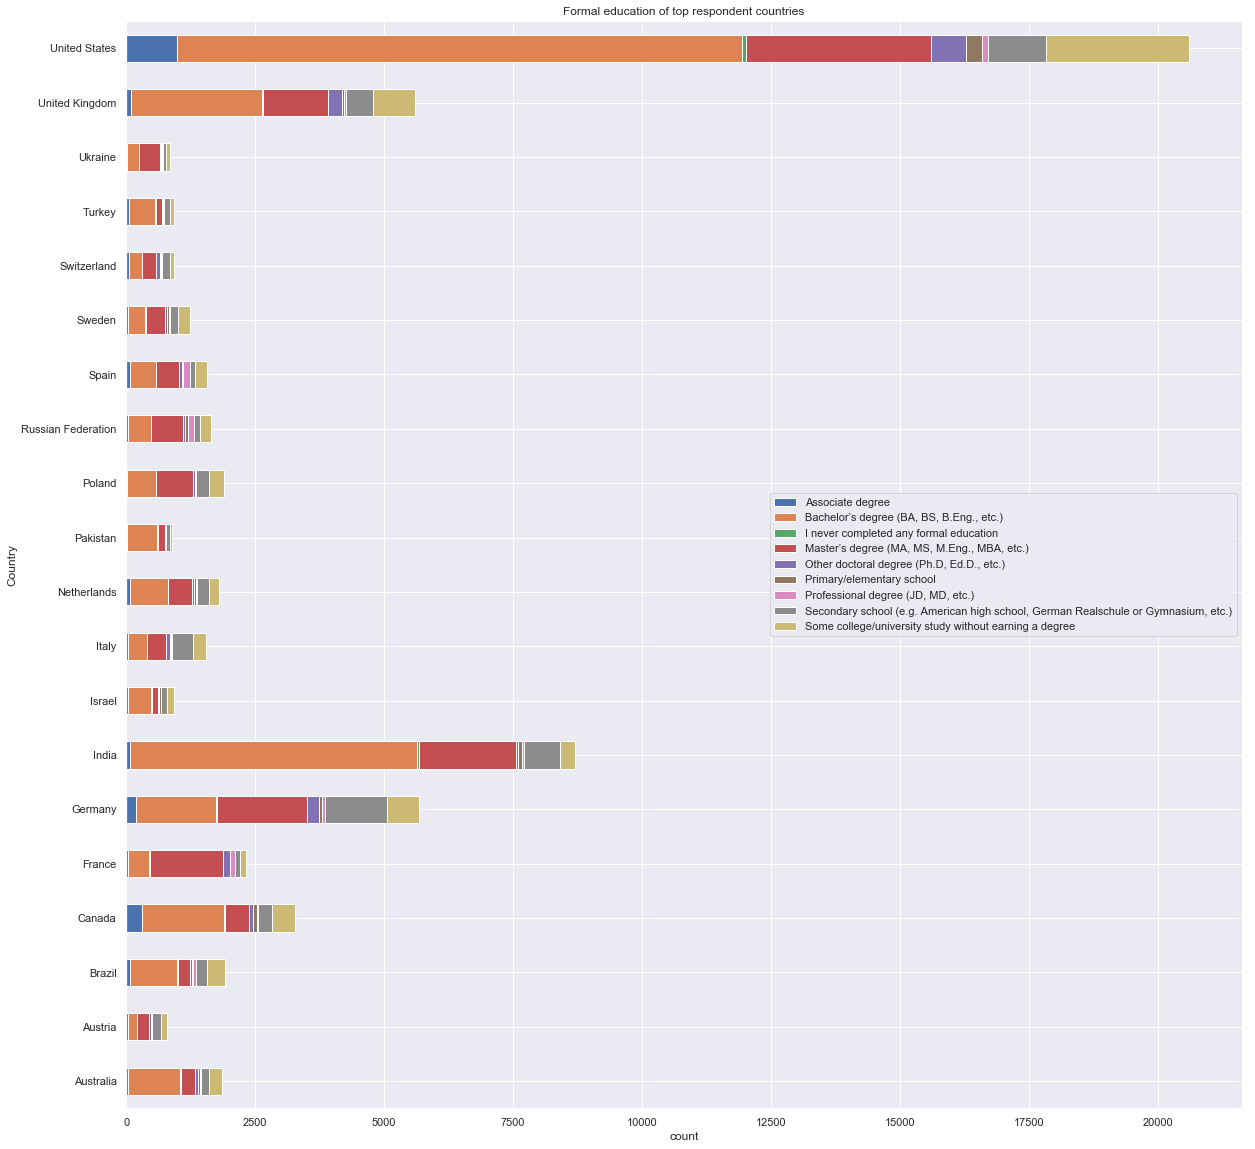

In [55]:
cou = list(df['Country'].value_counts()[:20].index)

x =df[df["Country"].isin(cou)]

ax = pd.crosstab(x["Country"],x["EdLevel"]).plot(kind="barh",stacked=True,
                                                         figsize=(20,20))
# ax.set_facecolor("k")
ax.set_xlabel("count")
ax.set_title("Formal education of top respondent countries")
ax.legend(loc="center right")
# plt.show()
plt.savefig('formal_education.png',bbox_inches='tight')

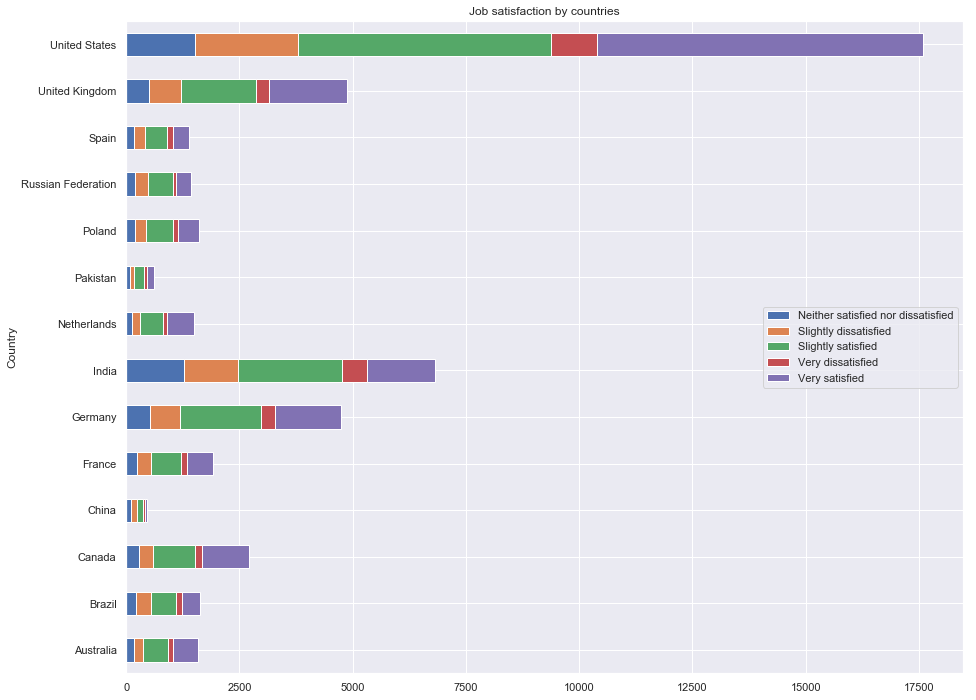

<Figure size 432x288 with 0 Axes>

In [53]:
x = pd.crosstab(df["Country"],df["JobSat"])
cou = ['India','United States','Germany','Brazil','United Kingdom','Russian Federation',
       'Canada','Poland','France','China','Australia','Spain',"Netherlands",'Pakistan']
x = x[x.index.isin(cou)]
ax = x.plot(kind="barh",stacked=True,figsize=(15,12))
ax.legend(loc="center right")
plt.title("Job satisfaction by countries")
# plt.show()
plt.savefig('job_statisfation.png',bbox_inches='tight')